In [6]:
# K-Means Clustering

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Carga del conjunto de datos
dataset = pd.read_csv("../../Datos/Mall_Customers.csv", sep = ",")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

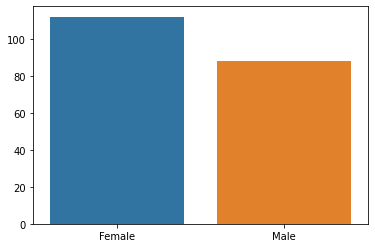

In [8]:
## 1er insight
sexo_customers = dataset['Genre'].value_counts()
plt.figure()
sns.barplot(x=sexo_customers.index, y = sexo_customers.values)

In [10]:
## 2do insight (rango de edades)
edad_18_25 = dataset['Age'][(dataset['Age']>=18) & (dataset['Age']<25)]
edad_25_35 = dataset['Age'][(dataset['Age']>=25) & (dataset['Age']<35)]
edad_35_45 = dataset['Age'][(dataset['Age']>=35) & (dataset['Age']<45)]
edad_45_55 = dataset['Age'][(dataset['Age']>=45) & (dataset['Age']<55)]
edad_55_mas = dataset['Age'][(dataset['Age']>=55)]



In [11]:
x = ['18-24', '25-34', '35-44', '45-54', '55+']
y = [len(edad_18_25), len(edad_25_35), len(edad_35_45), len(edad_45_55), len(edad_55_mas)]

Text(0, 0.5, 'Número de clientes')

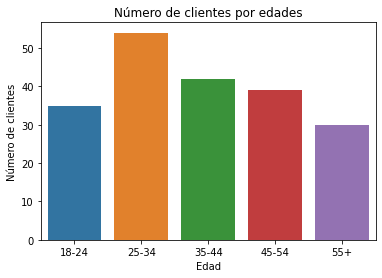

In [12]:
plt.figure()
sns.barplot(x=x, y = y)
plt.title('Número de clientes por edades')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')

In [14]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
#Generamos nuestra x
X = dataset.iloc[:, [3, 4]].values

Nos quedamos con las variables 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

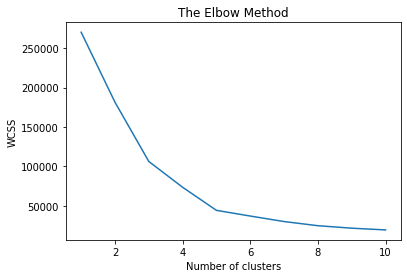

In [19]:
# Metodo del Codo para encontrar el numero optimo de clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Link de Interés: https://es.wikipedia.org/wiki/K-medias

En el bloque anterior, generamos los clusters para valores de 1 a 10 (en el rango de 1 a 11) y obtenemos para cada uno de ellos, la suma de las distancias con el tributo inertia_ del objeto kmeans. En la gráfica observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 5, por lo que, para este caso práctico, el número óptimo de clusters será de 5.



In [20]:
# Creando el k-Means para los 5 grupos encontrados
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

Para poder observar gráficamente la asignación de los 200 clientes a 5 grupos o clusters realizamos lo siguiente, le asignamos un color a cada grupo y marcamos los centroides en amarillo:

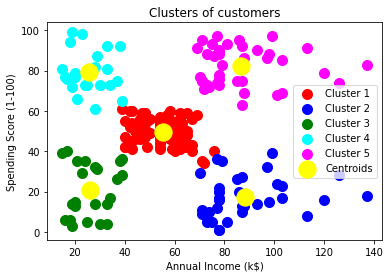

In [21]:
# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

1. Calcular el Índice de Silhouette

In [22]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


2. Generar las visualizaciones gráficas del Índice de Silhouette a través del uso de la librería **yellowbrick** para un K = 2, 3, 4, 5.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


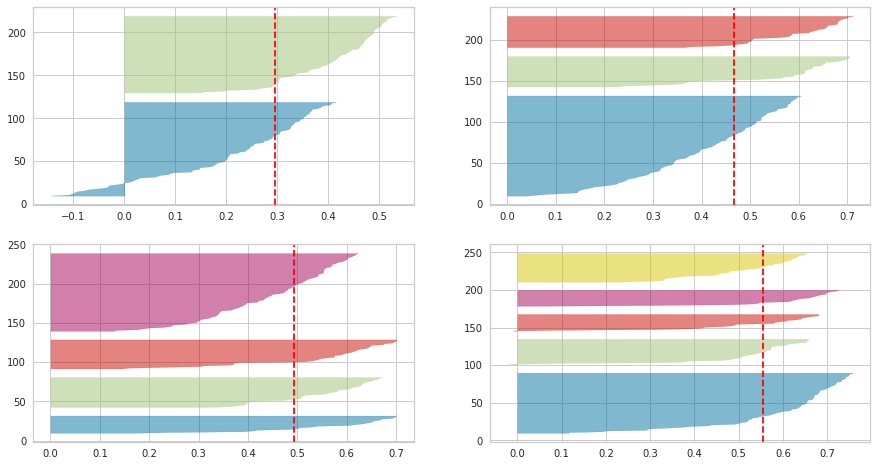

In [23]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

3. Interpretar los resultados obtenidos

Con la aplicación del método de Silhouette, podemos corroborar que el número K = 5 es el valor más óptimo para nuestra clusterización, hecho que confirma la aplicación del método del codo (Elbow). 